In [1]:
import pandas as pd
%matplotlib notebook

In [10]:
df1 = pd.read_feather('../1_Data_Extraction/Data/dicom_df_0.feather')
#df2 = pd.read_feather('../1_Data_Extraction/Data/dicom_df_1.feather')
#df3 = pd.read_feather('../1_Data_Extraction/Data/dicom_df_2.feather')
#df4 = pd.read_feather('../1_Data_Extraction/Data/dicom_df_3.feather')
#df5 = pd.read_feather('../1_Data_Extraction/Data/dicom_df_4.feather')
#df6 = pd.read_feather('../1_Data_Extraction/Data/dicom_df_5.feather')
#df7 = pd.read_feather('../1_Data_Extraction/Data/dicom_df_6.feather')

In [ ]:
#df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

In [5]:
df = df1

In [6]:
df.head()

,Dicomdir,PatientId,StudyId,SeriesId,AccessionNumber,AcquisitionDate,AcquisitionDateTime,AcquisitionNumber,AcquisitionTime,AdmittingDiagnosesDescription,...,OverlayColumns,OverlayData,OverlayDescription,OverlayOrigin,OverlayRows,OverlayType,PatientComments,NameOfPhysiciansReadingStudy,EthnicGroup,PatientState
0,..\..\Scans\2022-01\DICOMDIR,ANONYM-XT8UJZ,1.2.40.0.13.1.31351380426905905351292839561978...,1.2.40.0.13.1.70506743092902795655309425996746...,GLKQKZDGQZGOZJX,20210610,151635.794,2,151635.794,,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,..\..\Scans\2022-01\DICOMDIR,ANONYM-XT8UJZ_1,1.2.40.0.13.1.17673763456969116914244798980205...,1.2.40.0.13.1.22199141000052275677980158947820...,QQCKBCDCAIJNUQI,20190221,184011.010,2,184011.000,,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,..\..\Scans\2022-01\DICOMDIR,ANONYM-XT8UJZ_2,1.2.40.0.13.1.16621219697005344268574789979711...,1.2.40.0.13.1.79080220071392034037718776900243...,PPCTFYIKTTTMOHC,20180314,233409.248,2,233409.248,,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
3,..\..\Scans\2022-01\DICOMDIR,ANONYM-XT8UJZ_3,1.2.40.0.13.1.16932927470742447813201714735294...,1.2.40.0.13.1.44600102249142374796035333831945...,KTJTLMCRRPPUONF,20211012,124143.010,1,124143.000,,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
4,..\..\Scans\2022-01\DICOMDIR,ANONYM-XT8UJZ_3,1.2.40.0.13.1.29987579509307136339818887016894...,1.2.40.0.13.1.33620446475559136671173278433456...,KTJTLMCRRPPUONF,20211012,125518.010,1,125518.000,,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None


In [14]:

df['Manufacturer'].unique()

siemens = df[df['Manufacturer'] == 'SIEMENS']
philips = df[df['Manufacturer'] == 'Philips']

In [5]:
df_small = df[["PatientId","PatientWeight","PatientSize","PatientAge","PatientSex", "BodyPartExamined", "ProcedureCodeSequence.CodeMeaning","Rows","Columns","SliceCount","PixelSpacing","SliceThickness", "PixelArrayFlat"]]
df_small

,PatientId,PatientWeight,PatientSize,PatientAge,PatientSex,BodyPartExamined,ProcedureCodeSequence.CodeMeaning,Rows,Columns,SliceCount,PixelSpacing,SliceThickness,PixelArrayFlat
0,ANONYM-XT8UJZ,80.0,1.81,064Y,M,ABDOMEN,PET-CT.F18 FDG .Ganzkörper,512,512,487,"[0.9765625, 0.9765625]",4.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,ANONYM-XT8UJZ_1,73.0,1.71,056Y,M,WHOLEBODY,PET-CT.F18 FDG .Stamm,512,512,567,"[1.171875, 1.171875]",3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,ANONYM-XT8UJZ_2,43.0,1.63,019Y,F,ABDOMEN,PET-CT.F18 FDG .Kopf/Stamm,512,512,323,"[0.9765625, 0.9765625]",3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,ANONYM-XT8UJZ_3,74.0,1.63,077Y,F,HEAD,PET-CT.F18 FDG .Hirn,512,512,119,"[1.171875, 1.171875]",3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,ANONYM-XT8UJZ_3,74.0,1.63,077Y,F,WHOLEBODY,PET-CT.F18 FDG .Stamm,512,512,567,"[1.171875, 1.171875]",3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ANONYM-XT8UJZ_90,58.0,1.58,080Y,F,WHOLEBODY,PET-CT.F18 FDG .Kopf/Stamm,512,512,567,"[1.171875, 1.171875]",3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
96,ANONYM-XT8UJZ_91,62.0,1.66,078Y,F,ABDOMEN,PET-CT.F18 FDG .Ganzkörper,512,512,420,"[0.9765625, 0.9765625]",4.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
97,ANONYM-XT8UJZ_92,72.0,1.80,025Y,M,WHOLEBODY,PET-CT.F18 FDG .Stamm,512,512,623,"[1.171875, 1.171875]",3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
98,ANONYM-XT8UJZ_93,80.0,1.72,077Y,M,ABDOMEN,PET-CT.F18 FDG .Stamm,512,512,293,"[0.9765625, 0.9765625]",3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [9]:
# load npy pixel array
import numpy as np

path = '../1_Data_Extraction/Data/PixelArray/Scan_1.npy'
array = np.load(path)
array.shape

(487, 512, 512)

In [12]:
df1['PixelArrayFile']

0        Scan_1.npy
1        Scan_2.npy
2        Scan_3.npy
3        Scan_4.npy
4        Scan_5.npy
           ...     
195    Scan_196.npy
196    Scan_197.npy
197    Scan_198.npy
198    Scan_199.npy
199    Scan_200.npy
Name: PixelArrayFile, Length: 200, dtype: object

In [8]:
import matplotlib.pyplot as plt

scan = df.iloc[96]
array = scan['PixelArrayFlat'].reshape((scan['SliceCount'], scan['Rows'], scan['Columns']))
print("Array shape:", array.shape)
print("PixelSpacing:", scan['PixelSpacing'], "SliceThickness:", scan['SliceThickness'])
# pixel aspects, assuming all slices are the same
pixel_spacing = scan.PixelSpacing
slice_thickness = scan.SliceThickness
ax_aspect = pixel_spacing[1] / pixel_spacing[0]
sag_aspect = pixel_spacing[1] / slice_thickness
cor_aspect = slice_thickness / pixel_spacing[0]

NameError: name 'df' is not defined

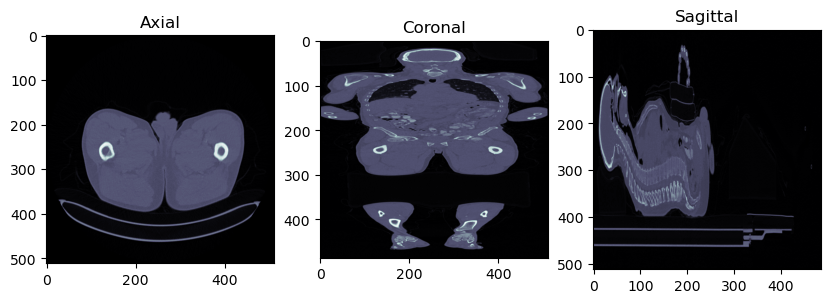

In [7]:
%matplotlib inline
plt.rc('grid', linestyle='')
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(array[array.shape[0] // 2, :, :], cmap='bone', aspect=ax_aspect)
ax[0].set_title("Axial")
ax[1].imshow(array[:, array.shape[1] // 2, :], cmap='bone', aspect=cor_aspect)
ax[1].set_title("Coronal")
ax[2].imshow(array[:, :, array.shape[2] // 2].T, cmap='bone', aspect=sag_aspect)
ax[2].set_title("Sagittal")
plt.show()

C:\Users\minem\miniconda3\envs\R&D\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (C:\Users\minem\miniconda3\envs\R&D\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


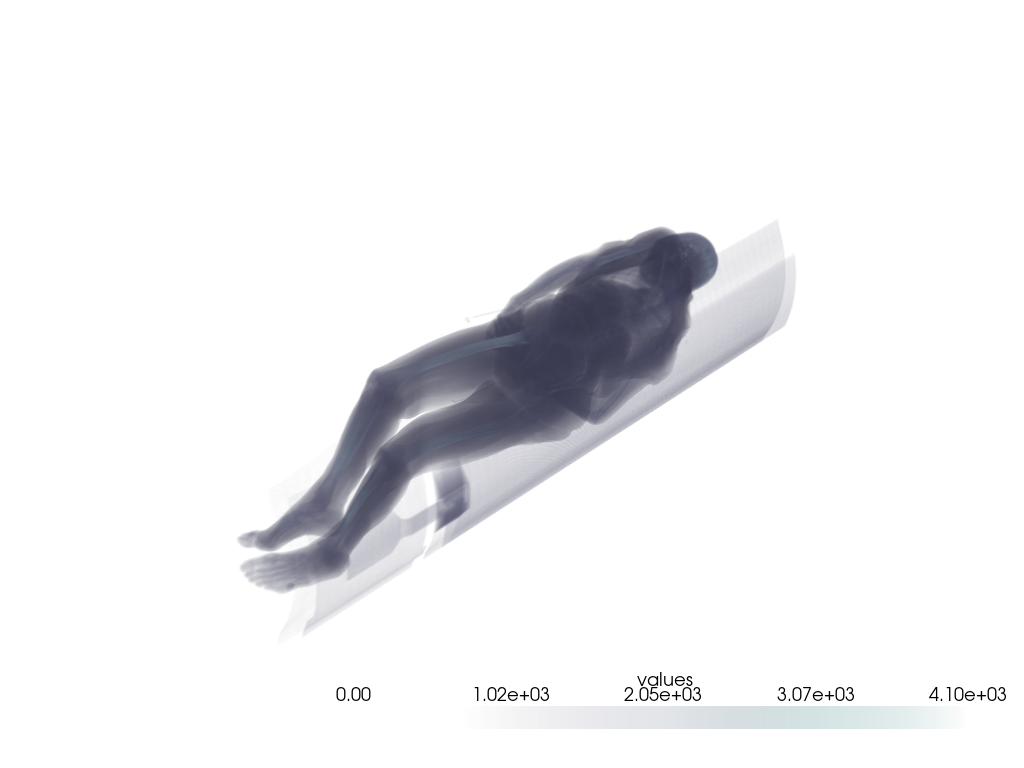

In [41]:
import pyvista as pv
import numpy as np

%matplotlib inline

# Create a PyVista grid object from the numpy array
grid = pv.ImageData()

# Set the grid dimensions: shape + 1 because we want to inject our values on the cell data
grid.dimensions = np.array(array.shape) + 1


# Set the grid spacing
grid.spacing = (slice_thickness, pixel_spacing[0], pixel_spacing[1])  # Spacing in x, y, z directions

# Set the grid origin to (0, 0, 0)
grid.origin = (0, 0, 0)

# Add the data values to the cell data
grid.cell_data["values"] = array.flatten(order="F")  # Flatten the array in Fortran order

# Visualize the volume
plotter = pv.Plotter()
opacity = [0, 0, 0.1, 0.2, 0.4, 0.6, 1]  # Adjust the opacity transfer function
plotter.add_volume(grid, scalars="values", opacity=opacity, cmap="bone")
plotter.show()

In [28]:
from matplotlib import animation

scan3d = array
frames = scan['SliceCount']

fig, ax = plt.subplots()
plt.grid(False)
im = plt.imshow(scan3d[0,:,:], cmap=plt.cm.bone, aspect=ax_aspect)
ax.set_title("Axial")

def update(frame):
    im.set_array(scan3d[frame, :, :])
    return im


anim = animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=100)
plt.show()

<IPython.core.display.Javascript object>

C:\Users\minem\miniconda3\envs\R&D\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [29]:
scan3d = array
frames = scan['Rows']

fig, ax = plt.subplots()
plt.grid(False)
im = plt.imshow(scan3d[:,0,:], cmap=plt.cm.bone, aspect=cor_aspect)
ax.set_title("Frontal")

def update(frame):
    im.set_array(scan3d[:, frame, :])
    return im

anim = animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=100)
plt.show()

<IPython.core.display.Javascript object>

In [16]:
scan3d = array
frames = scan['Columns']

fig, ax = plt.subplots()
plt.grid(False)
im = plt.imshow(scan3d[:,:,0].T, cmap=plt.cm.bone, aspect=sag_aspect)
ax.set_title("Saggital")

def update(frame):
    im.set_array(scan3d[:, :, frame])
    return im

anim = animation.FuncAnimation(fig=fig, func=update, frames=frames, interval=100)
plt.show()

<IPython.core.display.Javascript object>